#  MSCA 37011 - Deep Learning and Image Recognition
## Classification of IRIS dataset using Neural Networks

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets,metrics
#draw plots in the browser
%matplotlib inline 

### IRIS data set
#### https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width=200, height=200)

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()

print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

#view first 5 rows
print (iris.data[range(5)])
print (iris.target[range(5)])

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
#show it as a table
df = pd.DataFrame(data=iris.data)
df.columns = [iris.feature_names]
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((45, 4), (45,))

### Neural Network using Keras + Tensorflow

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import to_categorical

Categorical data must be converted to a numerical form. 

In [18]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return to_categorical(ids, len(uniques))

y_train_ohe = one_hot_encode_object_array(y_train)
y_test_ohe= one_hot_encode_object_array(y_test)

In [19]:
model = Sequential()

model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

model.add(Dense(3))
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_3 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [22]:
model.fit(X_train, y_train_ohe, epochs=100, batch_size=1, verbose=0);

In [23]:
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


In [24]:
classes = model.predict_classes(X_test)

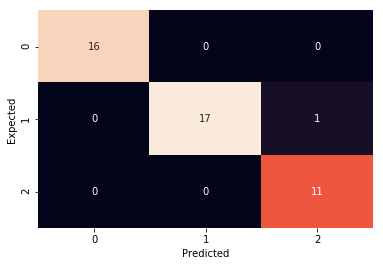

In [25]:
confusion_matrix =  pd.crosstab(index=y_test, columns=classes.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)